# The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 

Data Description:  The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. Domain:  Object recognition Context: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. Attribute Information: ● All the features are geometric features extracted from the silhouette.  ● All are numeric in nature. 
 
Learning Outcomes:  ● Exploratory Data Analysis ● Reduce number dimensions in the dataset with minimal information loss ● Train a model using Principal Components 
 
Objective:  Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using raw data. Steps and tasks: 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (15 points) 2. Understanding the attributes - Find relationships between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (15 points) 
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 20 points 4. Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X). 20 points 5. Optional - Use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. References

agglomerative nesting(AGNES)Hierarchical type
It becomes the last one group gathering the group in Euclidean distance. If you decide n number of the organization, the cluster is decided.

2.K-means(non-Hierarchical type)

First, you must decide k layer, select template in the randam, find the center of gravity (average value) with other points, and set the centroid to templatethe last most stable point. (the weakness is changed when the first template changes.)

3.Speckle

4.Self organizing map（SOM）

In [19]:
#2.1 Import python libraries to Load Data Set and downloaded to same directory in which this python file saved.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
Dataframe= pd.read_csv('vehicle.csv')
Dataframe.shape
Dataframe.apply(lambda x:sum(x.isnull()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

# Missing Value Treatment

In [22]:
df= Dataframe.iloc[:,:]
df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [152]:
#Checking the null Values

df.apply(lambda x:sum(x.isnull()))

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [150]:
# Filling the null value in cell by '' over axis=1
df = df.fillna(value='',axis=1)


#-----Other Method 


#Using For loop can drop over axis 

#df.dropna(subset=['circularity'], how='all', inplace = True)
#.fillna(‘’)

In [153]:
 #drop only if ALL columns are NaN
df.dropna(how='all')


df.apply(lambda x:sum(x.isnull()))

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [16]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

Shape of Data (Rows,Columns) (841, 19)
Are there null values in the data: False
---------------------------------------------
Categorical and Non Categorical Columns
Columns with Categorical Data ['distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.2', 'class']
Columns with Non Categorical Data ['compactness', 'circularity', 'max.length_aspect_ratio', 'max.length_rectangularity', 'skewness_about.1', 'hollows_ratio']
---------------------------------------------
Duplicate Rows based on all columns are : Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_

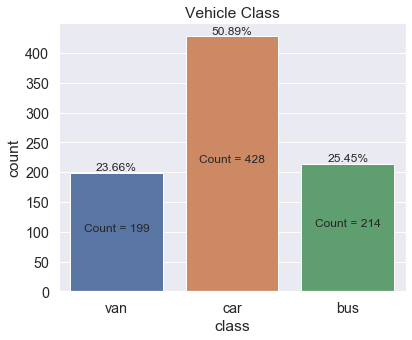

---------------------------------------------
----------  Findings of Initial Data Analyis-----------------------------------


In [154]:
## get the generic information of the data
## shape of the dataframe, null values existence,

print("Shape of Data (Rows,Columns)", df.shape)
print ("Are there null values in the data:",df.isnull().values.any())
print("---------------------------------------------")

print("Categorical and Non Categorical Columns")
cat_col = []
non_cat_col = []
for col in df.columns:
    if df[col].dtype.name == 'object':
        cat_col.append(col)
    else:
        non_cat_col.append(col)
print("Columns with Categorical Data", cat_col)
print("Columns with Non Categorical Data", non_cat_col)
print("---------------------------------------------")
### are there duplicate records
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows based on all columns are :",duplicateRowsDF)
##null values distribution across columns within the data set
print("---------------------------------------------")
print("--------------null values distribution across columns within the data set-------------------------------")
df.isna().sum()
print("---------------------------------------------")
print("---------------------------------------------")
print("---------printing the distribution of Class Column in the data:-------------#(Check Balance)-----------------------")
plt.subplots(figsize = (6,5))
sns.set(font_scale=1.3)
ax = sns.countplot(x = "class", data=df)
ax.set_title("Vehicle Class")
total = len(df) # for calculation of percentage

print("---------------------------------------------")
print("----------  #get Height of the column-----------------------------------")

for p in ax.patches:
  
    height = p.get_height()
    X = p.get_x() + p.get_width()/2
    Y = height + 4
    ax.text(X, Y, '{:1.2f}%'.format((height/total)*100), ha="center", size=12)
    ax.text(X, Y/2, f'Count = {height}', ha="center", size=12)
    plt.tight_layout()
## SEmicolon suppresses all the matplotlib text outputs. 
plt.show();


print("---------------------------------------------")
print("----------  Findings of Initial Data Analyis-----------------------------------")




There are 846 rows present in the data set with 19 Columns for each row.
18 Columns have non categorical datatype. (int64 and float64)
The columns "class" has categorical data having 3 different values of van,car and bus.
The graph shows the distribution of the data across the three classes. Class type car takes up 50% of the data within the Vehicle Data Set. While van and bus have near about similar counts within the data set.
Null Values are present within the data set. Columns radius_ratio and skewness_about have the highest number of null values

In [161]:
print("----------------------------------------------------------------------------")
print("------------------- Statistical Observations-----------------------------------")

stats_df = df.describe().round(2).T
stats_df["MeanToMedianRatio"] = (stats_df["mean"]/stats_df["50%"]).round(2)
stats_df

----------------------------------------------------------------------------
------------------- Statistical Observations-----------------------------------


,count,mean,std,min,25%,50%,75%,max,MeanToMedianRatio
compactness,841.0,93.65,8.21,73.0,87.0,93.0,100.0,119.0,1.01
circularity,841.0,44.83,6.15,33.0,40.0,44.0,49.0,59.0,1.02
max.length_aspect_ratio,841.0,8.58,4.61,2.0,7.0,8.0,10.0,55.0,1.07
max.length_rectangularity,841.0,147.94,14.50,118.0,137.0,146.0,159.0,188.0,1.01
skewness_about.1,841.0,12.63,8.94,0.0,5.0,11.0,19.0,41.0,1.15
hollows_ratio,841.0,195.69,7.41,181.0,191.0,197.0,201.0,211.0,0.99


In [163]:
## The function prints multiple dsitribution plots. The rows and columns indicicate the matrix of the 
## diagrams
def multipleDistPlot (no_of_rows,no_of_cols,data_df):
    ## set the subplots count
    figsize_x = 30/no_of_cols
    figsize_y = 18
    fig, axes = plt.subplots(ncols=no_of_cols, nrows=no_of_rows, figsize=(figsize_x,figsize_y))
    plt.subplots_adjust(hspace=0.8, wspace=0.2)
    ## loop through the data frame columns

----------------------------------------------------------------------
---------- ## Visualize the data distributions-----------------------------------
-----------## copy the original data frame to a new data frame-------------------
---------- -----------------------------------
----------------------------------------------------------------------
------ since the distplot requires not null values for plotting, we will adopt the strategy of replacing--------
---------- ---------## the null values with the corresponding median--------------------------


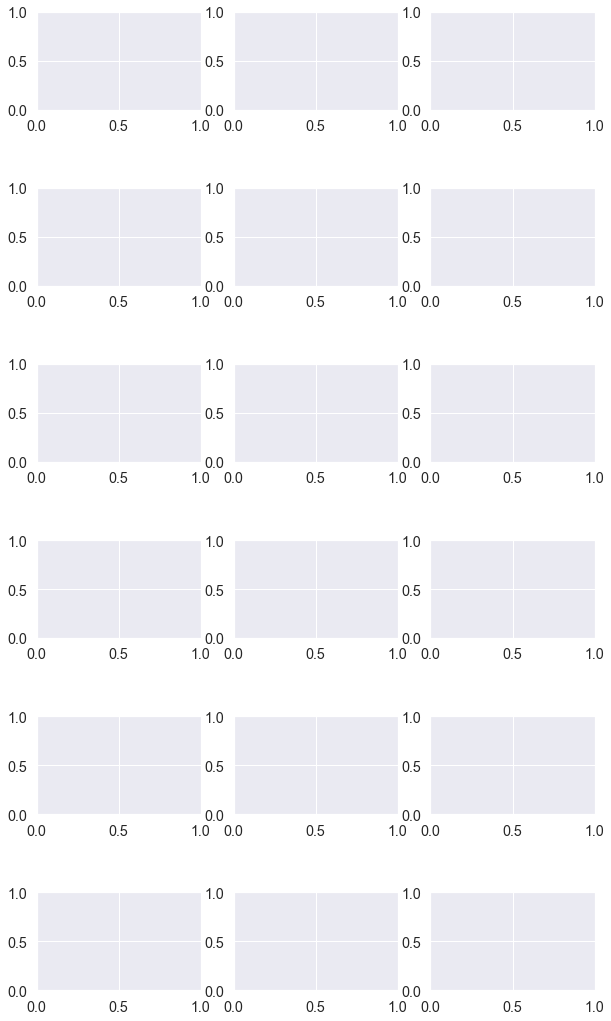

In [159]:
print("----------------------------------------------------------------------")
print("---------- ## Visualize the data distributions-----------------------------------")
print("-----------## copy the original data frame to a new data frame-------------------")
print("---------- -----------------------------------")


visual_df = df.copy()
#visual_df.head(2)
#visual_df = visual_df.fillna(visual_df.median())

print("----------------------------------------------------------------------")
print("------ since the distplot requires not null values for plotting, we will adopt the strategy of replacing--------")
print("---------- ---------## the null values with the corresponding median--------------------------")
for cols in visual_df.columns:
    if (visual_df[cols].dtypes == np.float64):
        visual_df[cols] = visual_df[cols].fillna(visual_df[cols].median())
        visual_df[cols] = visual_df[cols].astype('int64') ## change the float64 to int64 required for distplot
    if (visual_df[cols].dtypes == np.int64):
        visual_df[cols] = visual_df[cols].fillna(visual_df[cols].median())
#visual_df.isna().sum()

## drop the categorical column
visual_df.drop("class", axis=1, inplace=True)
multipleDistPlot (6,3,visual_df)

----------------------------------------------------------------------
---------- #### boxplot for outliers detection-----------------------------------


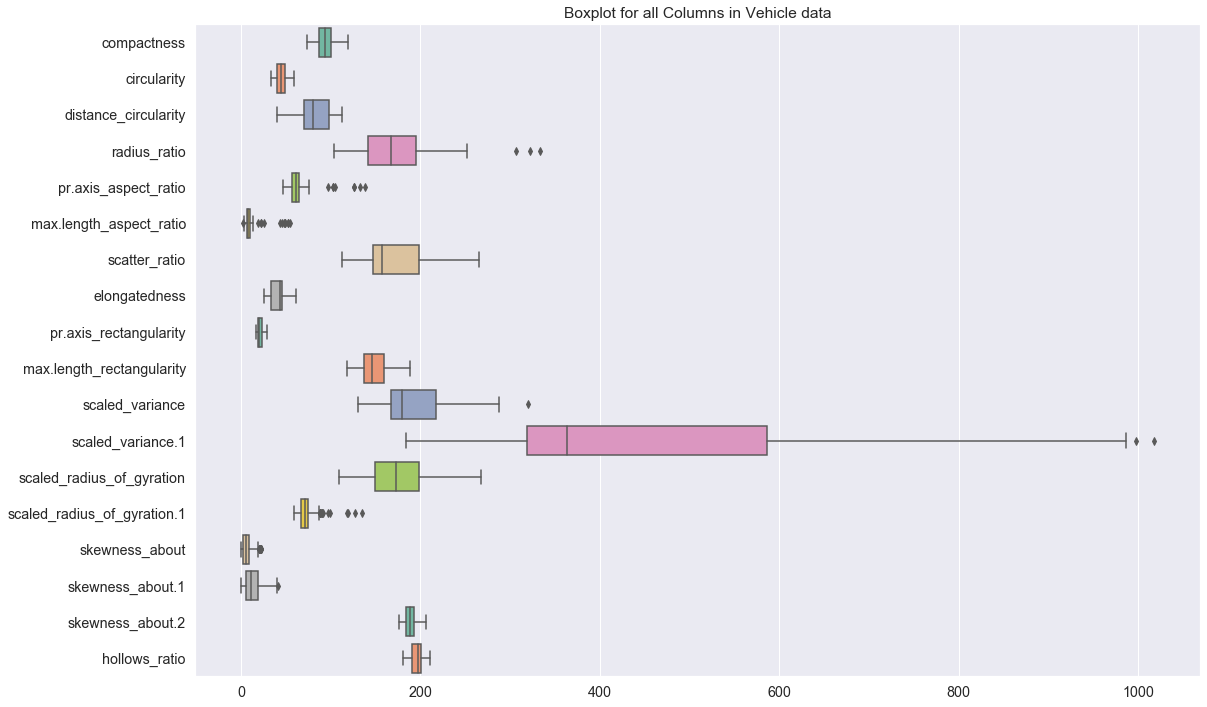

In [62]:
print("----------------------------------------------------------------------")
print("---------- #### boxplot for outliers detection-----------------------------------")

figsize_x = 18
figsize_y = 12
f,ax = plt.subplots(figsize=(figsize_x,figsize_y))
sns.boxplot(data=visual_df, orient="h", palette="Set2", ax =ax)
ax.set_title("Boxplot for all Columns in Vehicle data")
plt.show();

Statistical Inference: From the above

Columns have data distributed across multiple scales.
Several Column data have distributions that are not unimodal (e.g. distance_circularity,scatter_ratio,elongatedness
Column skweness_about, skewness_about.1 have data that is left skewed whereas skewness_about.2 data is nearly normally distributed.
Some columns have long right tail (e.g. pr.axis_aspect_ratio) evident from the distplot and chances are that they will have outliers.
        

In [160]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

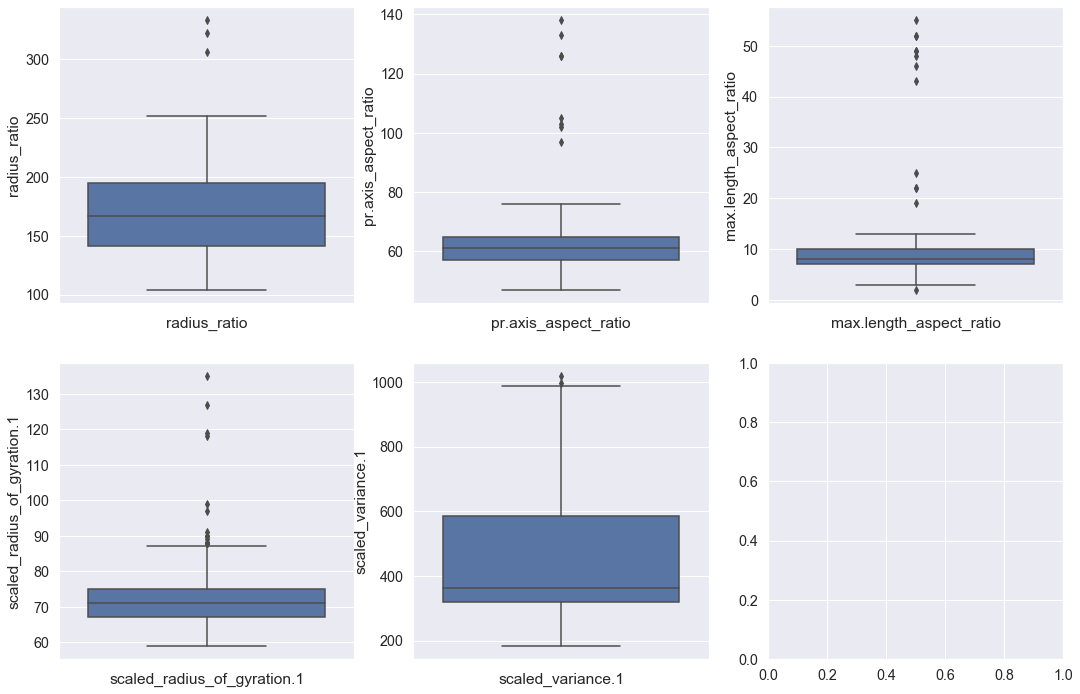

9

In [65]:
print("----------------------------------------------------------------------")
print("---------- #### boxplot for outliers detection--: Show details---------------------------------")
import math
def showdetailedOutliers (column_name,visual_df):
    no_cols = 3
    no_of_rows = math.ceil(len(column_name)/no_cols)
    figsize_x = 18
    figsize_y = 12
    fig, axes = plt.subplots(ncols=3, nrows=no_of_rows, figsize=(figsize_x,figsize_y))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    ## loop through the data frame columns
    for cols,ax in zip(column_name,axes.flat):
        #print ("Cols:", cols,"Axes:", ax)
        sns.boxplot(y=cols, data=visual_df, ax=ax)
        #sns.distplot(data_df[cols], hist=True, ax=ax)
        ax.set(xlabel=cols)
    plt.show();
column_name = ["radius_ratio","pr.axis_aspect_ratio","max.length_aspect_ratio",
               "scaled_radius_of_gyration.1","scaled_variance.1"]
showdetailedOutliers(column_name,visual_df)

visual_df["radius_ratio"][visual_df["radius_ratio"] > 250].count()
visual_df["pr.axis_aspect_ratio"][visual_df["pr.axis_aspect_ratio"] > 80].count()
visual_df["max.length_aspect_ratio"][visual_df["max.length_aspect_ratio"] > 18].count()
visual_df["scaled_radius_of_gyration.1"][visual_df["scaled_radius_of_gyration.1"] > 87].count()
visual_df["scaled_variance.1"][visual_df["scaled_variance.1"] > 950].count()

Outliers: From the above

Initial Boxplots indicates there are outliers in 5 different columns.
To get better understanding we plot indivdual column box plots and get the count of outlier values
scaled_radius_of_gyration.1 and scaled_variance.1 have higher number of outliers amongst the total number of outliers present in multiple columns.
We could see that around 5% fo the total records are outliers across multiple columns. (Count ~ 48). Hence we choose to remove the outliers assuming that they will have not any impact due to information loss since the count is low.

In [67]:
print("----------------------------------------------------------------------")
print("---------- ### removed the outliers---------------------------------")

visual_df = visual_df[visual_df["radius_ratio"] < 250]
visual_df = visual_df[visual_df["pr.axis_aspect_ratio"] < 80]
visual_df = visual_df[visual_df["max.length_aspect_ratio"] < 18]
visual_df = visual_df[visual_df["scaled_radius_of_gyration.1"] <87]
visual_df = visual_df[visual_df["scaled_variance.1"] < 950]

----------------------------------------------------------------------
---------- ### removed the outliers---------------------------------


Multivariate analysis

We will check in the following sections, how each column is corelated to each other using pairplot and correlation map.
The objective is to identify the columns which donot have corelation with others.
For the columns which show corelation between each other, we will apply PCA to reduce the number of features without loosing the important information.


## we will use the original dataframe and not have any null replacement
## or outliers removal since the data will be used to just visualize the data since this is for analysis only.

In [164]:
print("----------------------------------------------------------------------")
print("---------- ### Corelation Map---------------------------------")
corr = df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

----------------------------------------------------------------------
---------- ### Corelation Map---------------------------------


,compactness,circularity,max.length_aspect_ratio,max.length_rectangularity,skewness_about.1,hollows_ratio
compactness,1,0.69,0.15,0.67,0.16,0.37
circularity,0.69,1,0.25,0.97,-0.01,0.05
max.length_aspect_ratio,0.15,0.25,1,0.31,0.04,0.14
max.length_rectangularity,0.67,0.97,0.31,1,0,0.08
skewness_about.1,0.16,-0.01,0.04,0,1,0.2
hollows_ratio,0.37,0.05,0.14,0.08,0.2,1


----------------------------------------------------------------------
---------- ## print the heat map---------------------------------
---## split the pairplots into smaller sets for better visualisation---


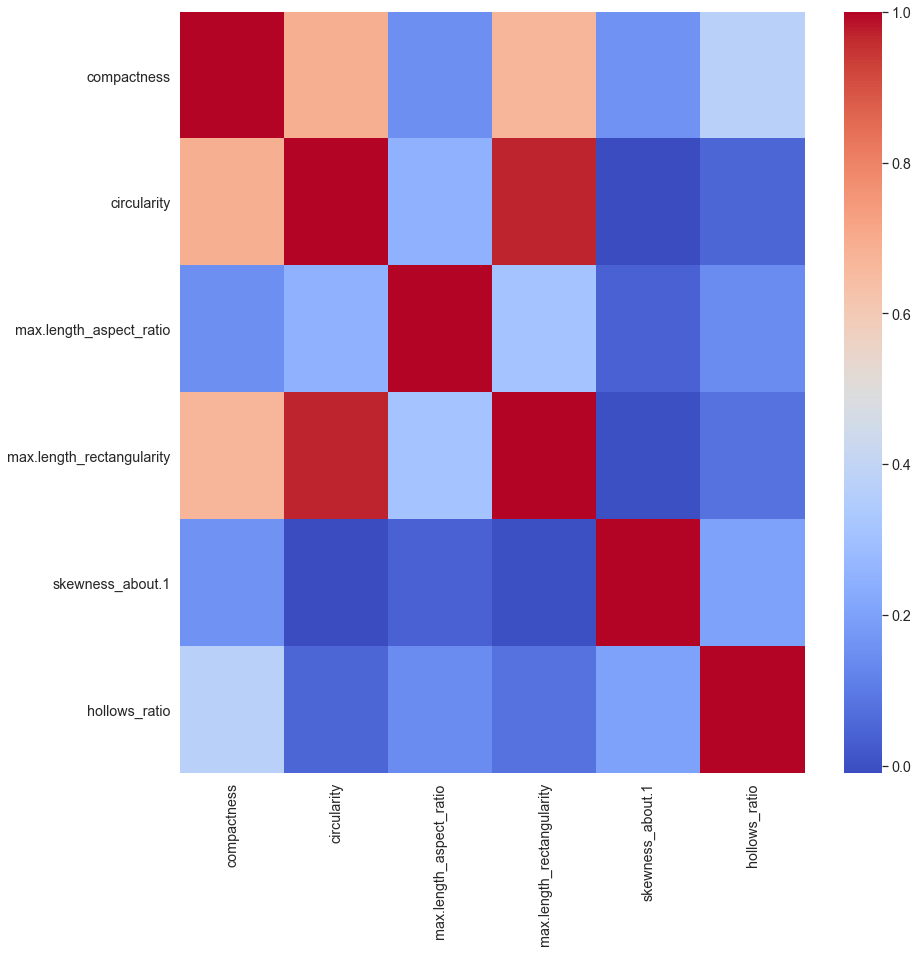

In [165]:
print("----------------------------------------------------------------------")
print("---------- ## print the heat map---------------------------------")



f,ax=plt.subplots(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='coolwarm',ax =ax)
print("---## split the pairplots into smaller sets for better visualisation---")
## we choose the columns for visualisation that have higher corelation as per the heat map. we define this as Set High

df1 = df[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','class']]
## columns which as per the heat map have lower corelations definded as Set Low
df2 = df[['pr.axis_aspect_ratio', 'max.length_aspect_ratio','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class']]
#sns.pairplot(data = df1,hue="class", palette="husl")

Observations from Heat Map

We notice that the following set of columns have high corelation amongst each other (Potential target for PCA Feature reduction)
['compactness', 'circularity', 'distance_circularity', 'radius_ratio','scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','class']

However we also notice that pr.axis_aspect_ratio and max.length_aspect_ratio donot have corelation with any other columns apart from themselves.
Similarly scaled_radius_of_gyration.1 has high negative corealtion with skewness_about.2 and hollows_ratio columns. it has very less corelation with others.
Similary hollows_ratio has high corelation with skewness_about.2 and scaled_radius_of_gyration.
We will look at each of the combinations to further analyse the corelation patterns

--------------------------------------------------------------------------------------------------------------------------------------
----------## pair plot for the set of columns that have a lower corelation amongst each other as per the heat map------------


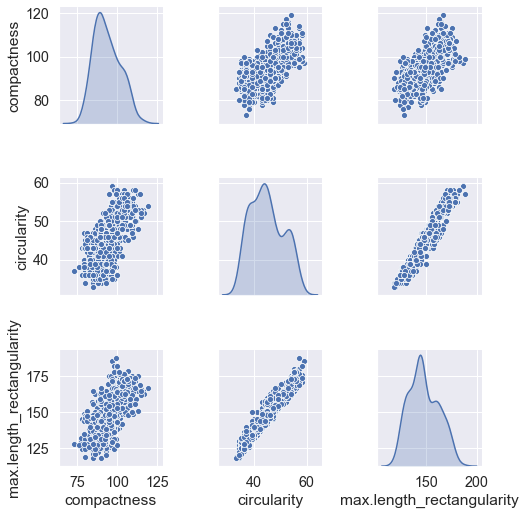

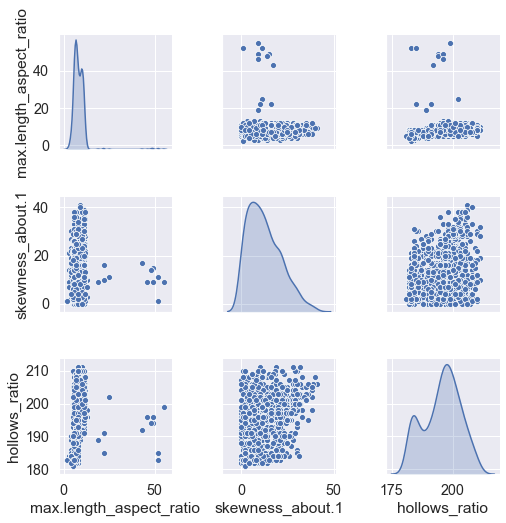

In [166]:
## pair plot for the set of columns that have a higher corelation amongst each other as per the heat map
sns.pairplot(data = df1,palette="husl", diag_kind="kde")

print("--------------------------------------------------------------------------------------------------------------------------------------")
print("----------## pair plot for the set of columns that have a lower corelation amongst each other as per the heat map------------")


sns.pairplot(data = df2,palette="husl", diag_kind="kde")

--------------------------------------------------------------------------------------------------------------------------------------
------Deep Dive to each Combination amongst fields that seem to be Corelated only to each other--------


ValueError: could not convert string to float: 

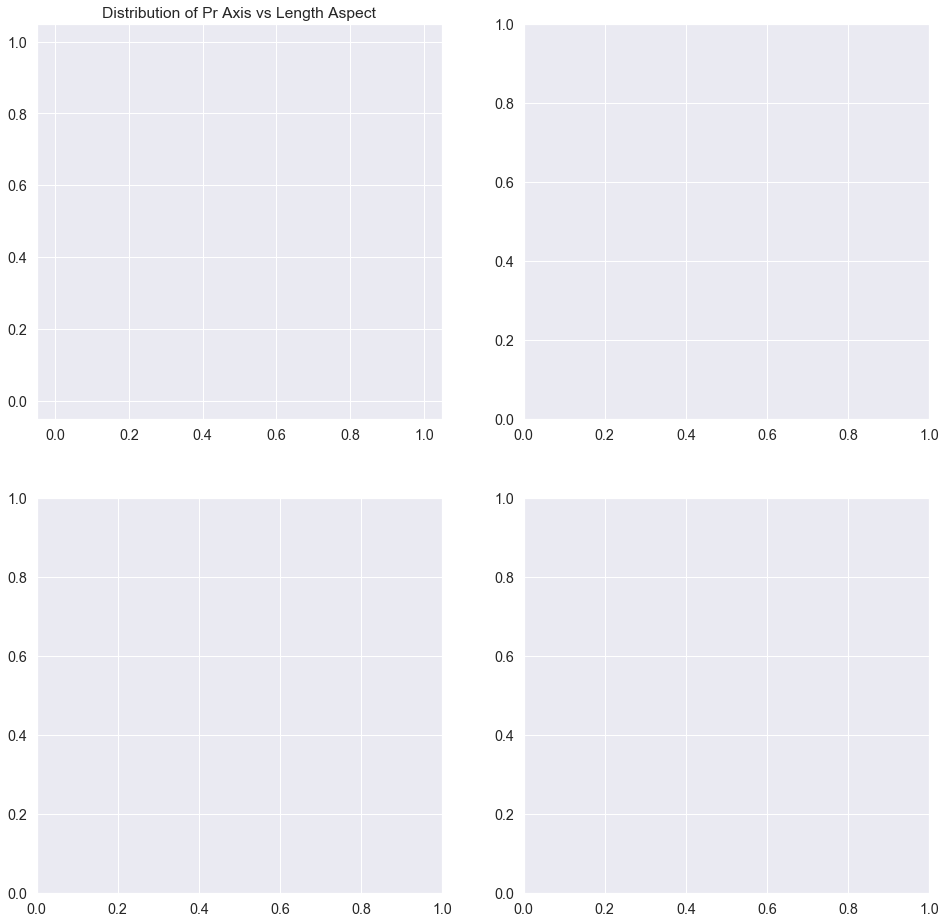

In [167]:
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("------Deep Dive to each Combination amongst fields that seem to be Corelated only to each other--------")

## plot the 4 columns as discussed in above section to view the corelation amongst themselves
df2 = df[['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 
       'scaled_radius_of_gyration.1', 'skewness_about.2', 'hollows_ratio', 'class']]
f,ax=plt.subplots(2,2,figsize=(16,16))
ax[0][0].set_title('Distribution of Pr Axis vs Length Aspect')
sns.scatterplot(x = 'pr.axis_aspect_ratio', y = 'max.length_aspect_ratio', data = df2,
                hue="class", palette="husl", ax =ax[0][0])

ax[0][1].set_title('Distribution of hollows ratio and Skewness About')
sns.scatterplot(x = 'hollows_ratio', y = 'skewness_about.2', data = df2,
                hue="class", palette="husl", ax =ax[0][1])

ax[1][0].set_title('Distribution of hollows ratio vs gyration radius')
sns.scatterplot(x = 'hollows_ratio', y = 'scaled_radius_of_gyration.1', data = df2,
                hue="class", palette="husl", ax =ax[1][0])

ax[1][1].set_title('Distribution of Gyration Radius vs Skewness About')
sns.scatterplot(x = 'scaled_radius_of_gyration.1', y = 'skewness_about.2', data = df2,
                hue="class", palette="husl", ax =ax[1][1])
plt.show();
#sns.scatterplot(x = 'pr.axis_aspect_ratio', y = 'max.length_aspect_ratio', data = df2,hue="class", palette="husl")


Observations from pair plot

Heat map indicated +Ve corelation between pr.axis_aspect_ratio and max.length_aspect_ratio. However on plotting the values we could see that there is not much of corelation if we ignore the outliers. (As per our earlier analysis through box plots we could see that max.length_aspect.ratio had highest number of outliers).
Hence we will include both the columns in our model. Also since they are not corelated we will not apply PCA on these columns.
Similarly 'skewness_about', 'skewness_about.1' columns donot have corelation with any other column and hence we will not apply PCA on those columns as well but include them as features in our model.
Hollows_ratio has got high corelation column skewness_about.2 and scaled_radius_of_gyration.1. So we will be use only Hollow_ratio column and drop skewness_about.2 and scaled_radius_of_gyration.1 assuming that the information contained in hollow_ratio column will also cover information contained in skewness_about.2 and scaled_radius_of_gyration.1 column.
However Hollow Ratio is not corelated to any other columns and hence we will not apply PCA on it but consider it as a feature in our model.
Heat map results are validated from the pair plot diagrams.

Summary

There are a set of features which are corelated to each other and hence will be used for PCA.
Out of the remaining columns, we choose only few columns as representational for the remaining.
We will apply PCA on the first set and merge with the remaining columns to create the data for model training and testing.
Actions based on the Data Exploration

Null Values - Replace Null values with median for the corresponding columns
Outliers - Remove the outliers from the data set based on earlier observations.
OUtcome variable is categorical(dtype as object) and needs to be replaced by 0(bus),1(car) and 2(van) for the three categories and changed to int64 datatype.
Feature Selection
Create 2 different sets of columns.
List High - List of columns which show very high corelation amongst each other.
List Low - List of Columns which show low corelation amongst each other.
Since the data is on different scales in the columns, we will have to scale the data before applying PCA.
List High - Apply PCA to identify the features containing the majority of the information.
List Low - Donot apply PCA. Replace multiple columns which are highly corelated to each other only by a single representational column as per the analysis.
Merge both the dataset and create the final model.
drop skewness_about.2 and scaled_radius_of_gyration.1 column
SPlit the data into training and testing and then train the model.
Finally test the model with the test data and generate reports.

# Final Processing of Data
Following sections of code will implement the actions described above

In [81]:
## DATA Preprocessing

## Copy data into a new data frame which will be used
work_df = df.copy()
work_df.shape
## create a new column with index as rownumbers to be used for merging
work_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [83]:
## convert class column from category to numerical values
work_df["class"] = work_df["class"].astype("category")
work_df["class"] = work_df["class"].cat.codes
work_df["class"] = work_df["class"].astype("int64")
## replace null values with median
for cols in work_df.columns:
    ## class column is categorical
    if(cols != "class"): 
        work_df[cols] = work_df[cols].fillna(work_df[cols].median())
        ## remove the outliers
## the limits are selected based on the visual boxplot whiskers for these columns.
work_df = work_df[work_df["radius_ratio"] < 250]
work_df = work_df[work_df["pr.axis_aspect_ratio"] < 80]
work_df = work_df[work_df["max.length_aspect_ratio"] < 18]
work_df = work_df[work_df["scaled_radius_of_gyration.1"] <87]
work_df = work_df[work_df["scaled_variance.1"] < 950]

## rest the index post cleaning the outliers
work_df = work_df.reset_index(drop=True)
# Store features high corelation and low corelation column names
high_cor_cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration']

## drop the columns skewness_about.2 and scaled_radius_of_gyration.1
low_cor_cols = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio','skewness_about', 'skewness_about.1','hollows_ratio']
        #'scaled_radius_of_gyration.1', 
        #'skewness_about.2', 
        
## drop the columns skewness_about.2 and scaled_radius_of_gyration.1

x_columns = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']
y_columns = ['class']

## Create the Feature and Prediction Dataframe
X = work_df[x_columns]
Y = work_df[y_columns]

In [84]:
## Scale the data using Standard Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [86]:
## Apply PCA on high Corelation columns
from sklearn.decomposition import PCA
## Copy the high corelation columns
X = X_std[high_cor_cols]

# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 11
Reduced number of features: 6


In [87]:
## creata a data Frrame from PCA
principalDataframe = pd.DataFrame(data = X_pca)

Percentage Variance [84.34  7.37  2.85  2.24  1.44  0.88]


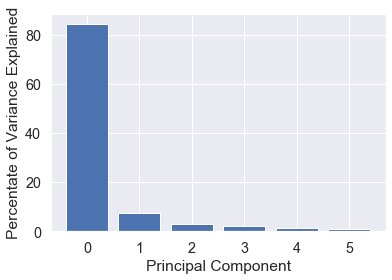

----------------------------------------------------------------------
--#Plotting the Cumulative Summation of the Explained Variance--


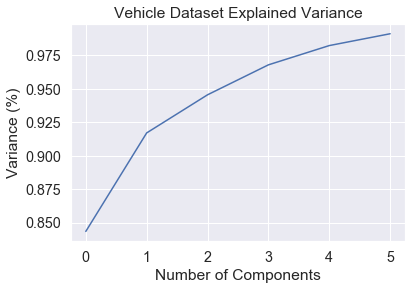

In [89]:
## PCA visualization how information is captured across components
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = principalDataframe.columns
plt.bar(x= range(1,7), height=percent_variance, tick_label=columns)
#plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
print("Percentage Variance", percent_variance)
plt.show();

print("----------------------------------------------------------------------")
print("--#Plotting the Cumulative Summation of the Explained Variance--")

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Vehicle Dataset Explained Variance')
plt.show();


Findings After applying PCA

We can see that the first Component explains more than 80% of variation.
BEtween first three components, more than 95% of the information is captured.
We will try to plot the values the three components for visualisation of the information distribution.

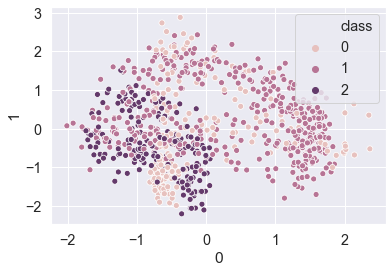

In [91]:
## combine the data frames for final feature selection
other_features = X_std[low_cor_cols]#stores the columns that donot have corelation

## we use the data frame for data distribution visualization after PCA application and reduction of features
X_pca_visual = pd.merge(principalDataframe,Y,right_index=True, left_index=True)


#merge with the data frame from pca (first three components)
principalDataframe1 = principalDataframe.iloc[:,0:3]
#principalDataframe1.head()
X = pd.merge(principalDataframe1,other_features,right_index=True, left_index=True)
#X.head()
## Scatter visualization of data across 1st two components which provides more than 90% of information
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(X_pca_visual.loc[:,0],X_pca_visual.loc[:,1], hue = X_pca_visual["class"], palette=cmap )

## 0 is bus
## 1 is car
## 2 is van

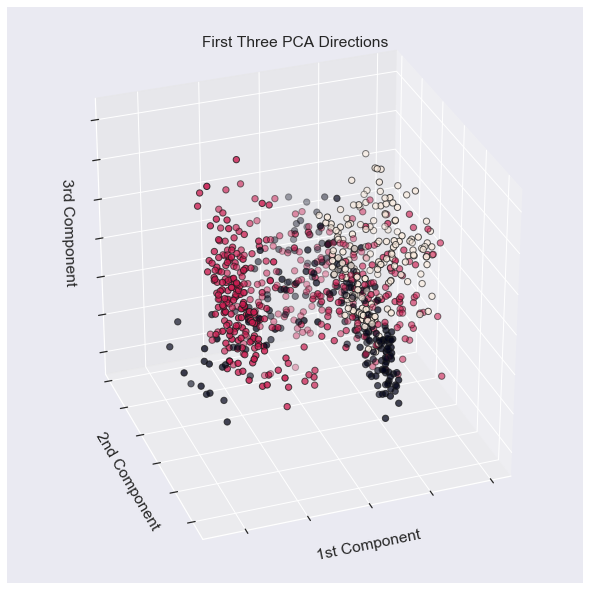

In [93]:
## 3D visualization for the distribution of data across the 1st three components
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()

fig = plt.figure(1,figsize = (8,8))
ax = Axes3D(fig,elev = -150,azim=110)
scatter = ax.scatter (X_pca_visual.loc[:,0],X_pca_visual.loc[:,1],X_pca_visual.loc[:,2],
            c=X_pca_visual["class"], edgecolor = 'k', s=40)
ax.set_title("First Three PCA Directions")
ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.set_zlabel("3rd Component")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

#colors = [sc.cmap(sc.norm(i)) for i in [1, 2, 0]]
#custom_lines = [plt.Line2D([],[], ls="", marker='.', 
#               mec='k', mfc=c, mew=.1, ms=20) for c in colors]
#ax.legend(custom_lines, [lt[0] for lt in labelTups], 
#          loc='center left', bbox_to_anchor=(1.0, .5))

#plt.legend(X_pca_visual["class"].unique(), ['bus', 'car','van']);
#plt.legend(framealpha=1, frameon=True)
plt.show();

Data Splitting and Model Training and Testing

We use the SVM with linear Kernel for Fitting the model
Model1 - Train an SVM model (without tuning) along with features (selected using PCA and visual analysis)

In [95]:
## Now we Split the data set into train and test
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
## Split the train and test data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
## build the SVM model on training data
svc_model = SVC (C =.1, kernel = "linear", gamma=1)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Train Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))


C:\Users\ajit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score on Train Data 0.8621908127208481
Score on Test Data 0.8436213991769548
Confusion Matrix:
 [[ 44  11   5]
 [ 10 104   4]
 [  1   7  57]]
              precision    recall  f1-score   support

         bus       0.73      0.80      0.77        55
         car       0.88      0.85      0.87       122
         Van       0.88      0.86      0.87        66

    accuracy                           0.84       243
   macro avg       0.83      0.84      0.83       243
weighted avg       0.85      0.84      0.84       243



Model1 - Summary Findings After applying SVM

The accuracy score is 84% for test data when we used the 1st three components features obtained from PCA along with other features within the data set.
Confusion matrix indicates that out of 55 bus, 44 were identified correctly, 11 incorrectly.
for 122 cars, 104 were identified correctly, 18 identified incorrectly
for 66 vans, 57 were idenitified correctly and 9 identified incorrectly.
Model1 - Tuning SVM parameters using Grid SEarch

In [96]:
# Grid Search
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
# Parameter Grid

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ] 
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)


#$#$#$#$#$Use The Best SVM Parameters

svc_model = SVC (C =50, kernel = "rbf", gamma=0.01)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Train Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Score on Train Data 0.9575971731448764
Score on Test Data 0.9300411522633745
Confusion Matrix:
 [[ 52   4   1]
 [  3 112   3]
 [  0   6  62]]
              precision    recall  f1-score   support

         bus       0.91      0.95      0.93        55
         car       0.95      0.92      0.93       122
         Van       0.91      0.94      0.93        66

    accuracy                           0.93       243
   macro avg       0.92      0.93      0.93       243
weighted avg       0.93      0.93      0.93       243



[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    8.4s finished


Summary for Selected Features Used with PCA

The Test data prediction accuracy increases from 84% to 93% which is a considerable improvement when used tuned parameters.
Performance across all the categories (bus,car and van) increases considerably for both precision and recall.
Model1 - Additional check - Use all parameters (PCA 6 components + 7 additional features present within the data)

We use all the Features received out of PCA along with additional features present within the data set and check if there is improvement in the model performance.

In [98]:
## select all the columns not part of PCA
low_cor_cols = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio','skewness_about', 'skewness_about.1',
                'scaled_radius_of_gyration.1','skewness_about.2','hollows_ratio']       
other_features = X_std[low_cor_cols]

## combine with all the 6 components received from PCA transformation.
X = pd.merge(principalDataframe,other_features,right_index=True, left_index=True)

## split, Train and test model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

## build the SVM model on training data
svc_model = SVC (C =.1, kernel = "linear", gamma=1)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))

Score on Training Data 0.9399293286219081
Score on Test Data 0.9094650205761317
Confusion Matrix:
 [[ 52   9   5]
 [  3 109   1]
 [  0   4  60]]
              precision    recall  f1-score   support

         bus       0.79      0.95      0.86        55
         car       0.96      0.89      0.93       122
         Van       0.94      0.91      0.92        66

    accuracy                           0.91       243
   macro avg       0.90      0.92      0.90       243
weighted avg       0.92      0.91      0.91       243



Additional Observations (Please see below )

if we use all the principal components as features, the model score improves to 90%.
precision and recall values also improves considerably.

Model1 -Additional Check - Tune SVM Parameters

In [102]:
# Parameter Grid
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ] 
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)
## build the SVM model on training data
svc_model = SVC (C =10, kernel = "rbf", gamma=0.01)
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data",svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print(metrics.classification_report(y_test, prediction, target_names=target_names))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Score on Training Data 0.980565371024735
Score on Test Data 0.9711934156378601
Confusion Matrix:
 [[ 54   1   1]
 [  1 119   2]
 [  0   2  63]]
              precision    recall  f1-score   support

         bus       0.96      0.98      0.97        55
         car       0.98      0.98      0.98       122
         Van       0.97      0.95      0.96        66

    accuracy                           0.97       243
   macro avg       0.97      0.97      0.97       243
weighted avg       0.97      0.97      0.97       243



[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    6.1s finished


Model1- Additional Check-Summary

Model yields improved results - accuracy of 97% post tuning the parameters.
This is the best score yielded across all the different models that have been tested in this project.
The precision and recall values are all above or equal to 95% across car, bus and van classes.


# Model 2 - Apply SVM on the original data set (No Feature Selection)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.3, random_state = 10) 
## build the SVM model on training data
svc_model = SVC (C =.1, kernel = "linear", gamma=1)
#svc_model = SVC (C =10, kernel = "rbf", gamma=0.01)
#'C': 10, 'gamma': 0.01, 'kernel': 'rbf'
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data", svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print("---- Classification Report -----")
print(metrics.classification_report(y_test, prediction, target_names=target_names))

Score on Training Data 0.9381625441696113
Score on Test Data 0.9218106995884774
Confusion Matrix:
 [[ 52   7   4]
 [  3 110   0]
 [  0   5  62]]
---- Classification Report -----
              precision    recall  f1-score   support

         bus       0.83      0.95      0.88        55
         car       0.97      0.90      0.94       122
         Van       0.93      0.94      0.93        66

    accuracy                           0.92       243
   macro avg       0.91      0.93      0.92       243
weighted avg       0.93      0.92      0.92       243



# Model2 - Summary Findings After applying SVM

The accuracy score is 92% for test data if we use the entire data set. This is higher than Model 1.
Confusion matrix indicates that out of 55 bus, 52 were identified correctly, 3 incorrectly. (Considerable improvement from Model1)
for 122 cars, 110 were identified correctly, 12 identified incorrectly (Slight Improvement)
for 66 vans, 62 were idenitified correctly and 4 identified incorrectly. (Considerable Improvement)
Overall, the Model 2 performs better than Model 1 based on Test Data.

# Model 2 - Tuning- Select parameters for SVM using Grid SEarch

In [104]:
# Grid Search
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
# Parameter Grid

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ] 
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    5.0s finished


In [106]:
# use Identified best parameters for Model Training and testing
svc_model = SVC (C =10, kernel = "rbf", gamma=0.01)
#'C': 10, 'gamma': 0.01, 'kernel': 'rbf'
svc_model.fit(X_train,y_train)
prediction= svc_model.predict(X_test)
print ("Score on Training Data",svc_model.score(X_train, y_train))
print ("Score on Test Data", svc_model.score(X_test,y_test))
print ("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
target_names = ['bus', 'car', 'Van']
print("---- Classification Report -----")
print(metrics.classification_report(y_test, prediction, target_names=target_names))

Score on Training Data 0.9787985865724381
Score on Test Data 0.9670781893004116
Confusion Matrix:
 [[ 55   2   1]
 [  0 116   1]
 [  0   4  64]]
---- Classification Report -----
              precision    recall  f1-score   support

         bus       0.95      1.00      0.97        55
         car       0.99      0.95      0.97       122
         Van       0.94      0.97      0.96        66

    accuracy                           0.97       243
   macro avg       0.96      0.97      0.97       243
weighted avg       0.97      0.97      0.97       243



# Model 2 - Findings after tuning

# The Accuracy increases further to 96%.
Performance for identifying bus shows no errors on test data, while car and van category predictions also improve further.

# Project Summary
The Vehicle data was processed for Null Values and Outliers.
Post the processing the data was scaled using Standard Scaler.
PCA application on highly corelated features - Resulted in 11 Features reduced to 6 with 95% information held by the first three components.

Model 1

Features - First three PCA compoments + a subset of features from the non corelated ones was selected.
SVM model was applied with Linear Kernel.
Resulted in 84% accuracy on Test data
GridSearch was used to Tune the SVM parameters
Tuned Parameters resulted in improvement of the accuracy to 93%
Model 1 - Additional Check

Features - As an additional Check the features were increased to include all 6 PCA Components and all the non corelated features.
On applying SVM, the performance was better than selected feature set and yielded an accuracy of 90%
Further on using tuned parameters for SVM, the performance increased to an accuracy of 97% with the precision and recall across all the classes all equal and above 95%.
Model2

Features - Selected all features from the orginal data set.
SVM Model with the test data yielded an accuracy of 92%
On tuning the parameters and again testing the data, the accuracy increased to 96%.
The model was able to predict all bus images without any error.

# Model 1 built with a SVM parameters of ('C': 10, 'gamma': 0.01, 'kernel': 'rbf') applied on training data containing all the 6 PCA components as the features along with all the non corelated features (Count:7) performed the best on the Test Data.